In [1]:
import matplotlib.pyplot as plt

goal = 10
p_win = 0.4
gamma = 1.0
states = list(range(goal + 1))
actions = {s: list(range(1, min(s, goal - s) + 1)) for s in states}

In [3]:
def transition_model(state, action):
    if state == 0 or state == goal or action > min(state, goal - state):
        return [(1.0, state)]
    win_state = state + action
    lose_state = state - action
    return [(p_win, win_state), (1 - p_win, lose_state)]

In [5]:
def rewards(s, a, s_):
    return 1 if s_ == goal else 0

In [7]:
def value_iteration(states, actions, transition_model, rewards, gamma=0.9, theta=1e-6):
    V = {s: 0 for s in states}
    policy = {s: None for s in states}
    V[goal] = 1
    V[0] = 0

    while True:
        delta = 0
        for s in states:
            if s == 0 or s == goal:
                continue
            best_action = None
            best_value = float('-inf')
            for a in actions[s]:
                q = sum(p * (rewards(s, a, s_) + gamma * V[s_])
                        for p, s_ in transition_model(s, a))
                if q > best_value:
                    best_value = q
                    best_action = a
            delta = max(delta, abs(V[s] - best_value))
            V[s] = best_value
            policy[s] = best_action
        if delta < theta:
            break
    return V, policy

In [9]:
def policy_iteration(states, actions, transition_model, rewards, gamma=0.9, theta=1e-6):
    policy = {s: (actions[s][0] if s != 0 and s != goal else None) for s in states}
    V = {s: 0 for s in states}
    V[goal] = 1
    V[0] = 0

    while True:
        # Policy Evaluation
        while True:
            delta = 0
            for s in states:
                if s == 0 or s == goal:
                    continue
                a = policy[s]
                v = V[s]
                V[s] = sum(p * (rewards(s, a, s_) + gamma * V[s_])
                           for p, s_ in transition_model(s, a))
                delta = max(delta, abs(v - V[s]))
            if delta < theta:
                break

        # Policy Improvement
        policy_stable = True
        for s in states:
            if s == 0 or s == goal:
                continue
            old_action = policy[s]
            best_action = max(actions[s], key=lambda a: sum(
                p * (rewards(s, a, s_) + gamma * V[s_]) for p, s_ in transition_model(s, a)))
            policy[s] = best_action
            if old_action != best_action:
                policy_stable = False
        if policy_stable:
            break
    return V, policy

In [11]:
V_vi, policy_vi = value_iteration(states, actions, transition_model, rewards, gamma=gamma)

In [13]:
V_pi, policy_pi = policy_iteration(states, actions, transition_model, rewards, gamma=gamma)

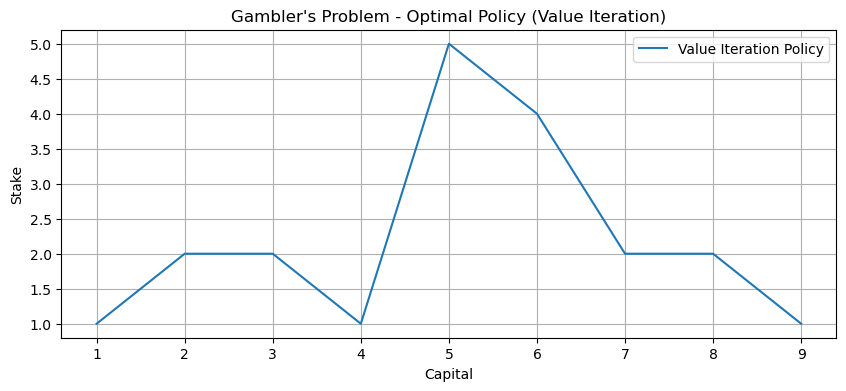

In [15]:
plt.figure(figsize=(10, 4))
plt.plot(
    [s for s in policy_vi if policy_vi[s] is not None],
    [policy_vi[s] for s in policy_vi if policy_vi[s] is not None],
    label='Value Iteration Policy'
)
plt.xlabel('Capital')
plt.ylabel('Stake')
plt.title("Gambler's Problem - Optimal Policy (Value Iteration)")
plt.grid(True)
plt.legend()
plt.show()

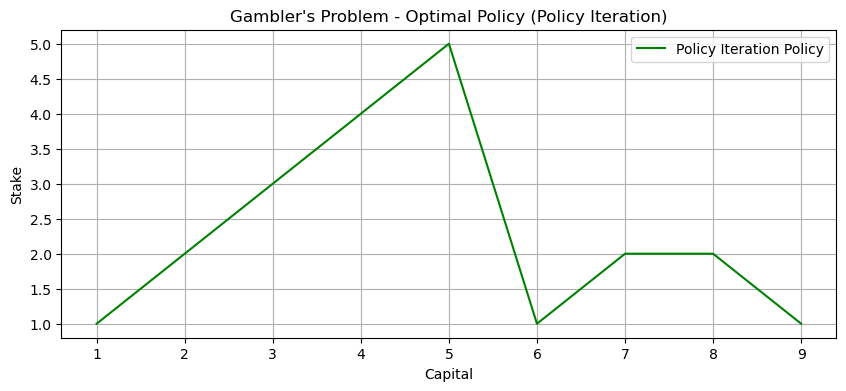

In [17]:
plt.figure(figsize=(10, 4))
plt.plot(
    [s for s in policy_pi if policy_pi[s] is not None],
    [policy_pi[s] for s in policy_pi if policy_pi[s] is not None],
    label='Policy Iteration Policy', color='green'
)
plt.xlabel('Capital')
plt.ylabel('Stake')
plt.title("Gambler's Problem - Optimal Policy (Policy Iteration)")
plt.grid(True)
plt.legend()
plt.show()